In [1]:
import numpy as np

indices = np.load("indices_train.npy")

In [6]:
import re

filename = "mprof_outputs.txt"
data = []

# Open the file and read its contents line by line
with open(filename, 'r') as file:
    lines = file.readlines()

# Define a regular expression pattern to match memory usage data
pattern = r'\d+\.\d+ MiB'

# Iterate through each line in the file
for line in lines:
    # Check if the line contains memory usage data
    if re.search(pattern, line):
        # Extract the memory usage data and append it to the list
        memory_usage = re.findall(pattern, line)
        data.append(float(memory_usage[0].split()[0]))  # Extract the numerical value and convert it to float

# Now 'data' contains the memory usage values extracted from the file
print(data)


[291.9, 291.9, 291.9, 291.9, 291.9, 291.9, 291.9, 301.9, 301.9, 415.5, 301.9, 301.9, 301.9, 415.5, 238.7, 238.7, 252.3, 252.3, 252.3, 252.3, 252.3, 252.3, 252.3, 291.9, 252.3, 252.3, 252.3, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 451.8, 415.5, 415.5, 415.5, 451.8, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 415.5, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 486.1, 451.8, 451.8, 451.8, 486.1, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 451.8, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 486.1, 520.9, 486.1, 486.1

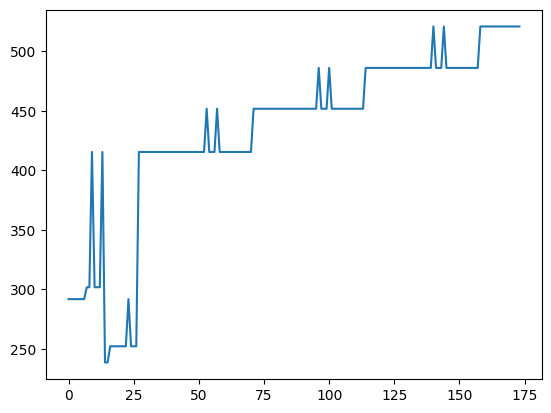

In [7]:
import matplotlib.pyplot as plt

plt.plot(data)

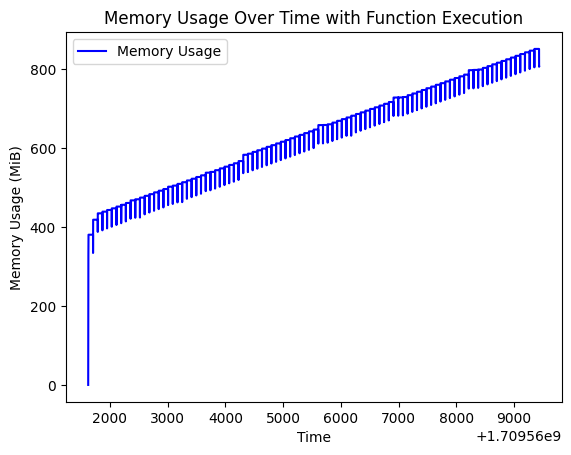

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
filename = "mprofile_20240304151343.dat"
with open(filename, 'r') as file:
    lines = file.readlines()

# Parse the data
memory_usage = []
function_starts = []
function_ends = []

for line in lines:
    parts = line.split()
    if parts[0] == 'MEM':
        memory_usage.append((float(parts[2]), float(parts[1])))
    elif parts[0] == 'FUNC':
        function_name = parts[1]  # Extract function name
        timestamp = float(parts[-1])  # Extract timestamp
        if parts[2] == 'Start':
            function_starts.append((timestamp, function_name))
        elif parts[2] == 'End':
            function_ends.append((timestamp, function_name))

# Convert lists to numpy arrays for easier manipulation
memory_usage = np.array(memory_usage)
function_starts = np.array(function_starts)
function_ends = np.array(function_ends)

# Plot the memory usage over time
plt.plot(memory_usage[:, 0], memory_usage[:, 1], label='Memory Usage', color='blue')

# Mark function start and end points on the plot
for point, function_name in function_starts:
    plt.scatter(point, 0, marker='o', color='red', label=function_name + ' Start')

for point, function_name in function_ends:
    plt.scatter(point, 0, marker='x', color='green', label=function_name + ' End')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage Over Time with Function Execution')

# Show legend
plt.legend()

# Show plot
plt.show()


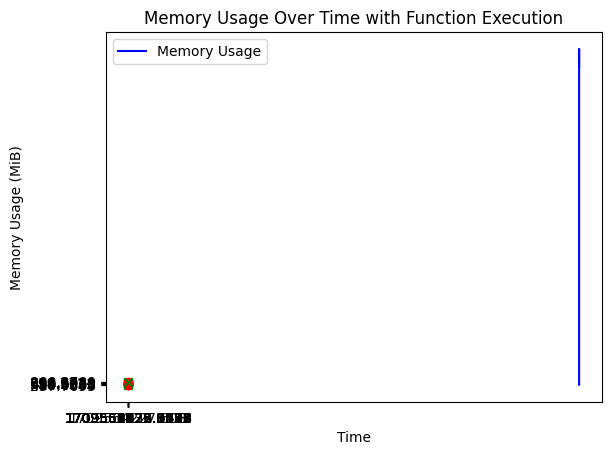

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Read data from the file
filename = "mprofile_20240304151343.dat"
with open(filename, 'r') as file:
    lines = file.readlines()

# Parse the data
memory_usage = []
function_calls = []

for line in lines:
    parts = line.split()
    if parts[0] == 'MEM':
        memory_usage.append((float(parts[2]), float(parts[1])))
    elif parts[0] == 'FUNC':
        function_name = parts[1]
        start_memory = float(parts[2])
        end_memory = float(parts[4])
        start_timestamp = float(parts[3])
        end_timestamp = float(parts[5])
        function_calls.append((start_timestamp, end_timestamp, start_memory, end_memory, function_name))

# Convert lists to numpy arrays for easier manipulation
memory_usage = np.array(memory_usage)
function_calls = np.array(function_calls)

# Plot the memory usage over time
plt.plot(memory_usage[:, 0], memory_usage[:, 1], label='Memory Usage', color='blue')

# Mark function start and end points on the plot
for start_timestamp, end_timestamp, start_memory, end_memory, function_name in function_calls:
    plt.scatter(start_timestamp, start_memory, marker='o', color='red', label=function_name + ' Start')
    plt.scatter(end_timestamp, end_memory, marker='x', color='green', label=function_name + ' End')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Memory Usage (MiB)')
plt.title('Memory Usage Over Time with Function Execution')

# Show legend
plt.legend()

# Show plot
plt.show()
